# Explore combined catalogue

Explore the sky coverage, magnitudes and colours of the Legacy and unWISE combined catalogues.

In [1]:
import os
import sys
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky

In [2]:
try:
    BASEPATH = os.path.dirname(os.path.realpath(__file__))
    data_path = os.path.join(BASEPATH, "..", "..", "data")
except NameError:
    if os.path.exists("data"):
        BASEPATH = "."
        data_path = os.path.join(BASEPATH, "data")
    else:
        BASEPATH = os.getcwd()
        data_path = os.path.join(BASEPATH, "..", "..", "data")

In [3]:
sys.path.append(os.path.join(BASEPATH, "..", "..", "src"))
from mltier1 import Field, Q_0, parallel_process, describe

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## Load data

In [6]:
combined = Table.read(os.path.join(data_path, "samples", "test_combined.fits"))

In [7]:
np.array(combined.colnames)

array(['RA', 'DEC', 'UID_L', 'UNWISE_OBJID', 'MAG_R', 'MAG_W1', 'MAG_W2'],
      dtype='<U12')

In [8]:
coords_combined = SkyCoord(
    combined["RA"], combined["DEC"], unit=(u.deg, u.deg), frame="icrs"
)

### Define subsamples

In [9]:
combined_legacy = (
    ~np.isnan(combined["MAG_R"])
    & ~np.isnan(combined["MAG_W1"])
    & ~np.isnan(combined["MAG_W2"])
)
np.sum(combined_legacy)  # Matches

98690803

In [10]:
combined_matched = ~np.isnan(combined["MAG_R"]) & (combined["UNWISE_OBJID"] != "N/A")
np.sum(combined_matched)

34694563

In [11]:
combined_legacy_only = ~np.isnan(combined["MAG_R"]) & (
    combined["UNWISE_OBJID"] == "N/A"
)
np.sum(combined_legacy_only)  # Only Legacy

63996240

In [12]:
combined_wise = np.isnan(combined["MAG_R"]) & (~np.isnan(combined["MAG_W1"]))
np.sum(combined_wise)  # Only WISE

17210552

In [13]:
combined_wise2 = np.isnan(combined["MAG_R"]) & np.isnan(combined["MAG_W1"])
np.sum(combined_wise2)  # Only WISE2

1856668

In [14]:
ra_legacy = coords_combined[combined_legacy][::1000].ra.wrap_at(180 * u.deg).radian
dec_legacy = coords_combined[combined_legacy][::1000].dec.radian
ra_matched = coords_combined[combined_matched][::10000].ra.wrap_at(180 * u.deg).radian
dec_matched = coords_combined[combined_matched][::10000].dec.radian
ra_legacy_only = coords_combined[combined_legacy_only][::1000].ra.wrap_at(180 * u.deg).radian
dec_legacy_only = coords_combined[combined_legacy_only][::1000].dec.radian
ra_wise = coords_combined[combined_wise][::1000].ra.wrap_at(180 * u.deg).radian
dec_wise = coords_combined[combined_wise][::1000].dec.radian
ra_wise2 = coords_combined[combined_wise2][::1000].ra.wrap_at(180 * u.deg).radian
dec_wise2 = coords_combined[combined_wise2][::1000].dec.radian

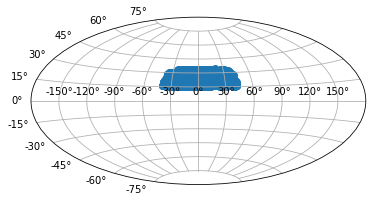

In [15]:
plt.subplot(111, projection="aitoff")
plt.scatter(ra_matched, dec_matched)
plt.grid(True)

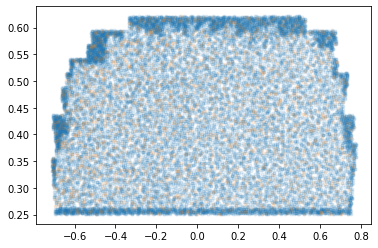

In [16]:
#plt.plot(ra_matched, dec_matched, marker=".", ls="", alpha=0.1)
#plt.plot(ra_legacy_only, dec_legacy_only, marker=".", ls="", alpha=0.1)
plt.plot(ra_wise, dec_wise, marker=".", ls="", alpha=0.1)
plt.plot(ra_wise2, dec_wise2, marker=".", ls="", alpha=0.1)

## Compare with the radio coverage

In [17]:
lofar_all = Table.read(os.path.join(data_path, "samples", "LoTSS_DR2_DUMMYCAT_FORPEPE_0h.srl.fits"))

In [18]:
coords_lofar = SkyCoord(lofar_all['RA'], 
                       lofar_all['DEC'], 
                       unit=(u.deg, u.deg), 
                       frame='icrs')

In [19]:
ra_lofar = coords_lofar.ra.wrap_at(180 * u.deg).radian
dec_lofar = coords_lofar.dec.radian

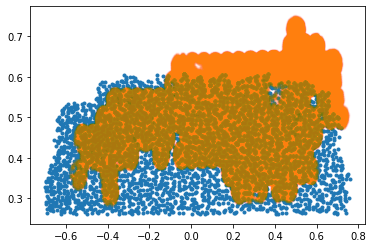

In [20]:
plt.plot(ra_matched, dec_matched, marker=".", ls="", alpha=1)
plt.plot(ra_lofar, dec_lofar, marker=".", ls="", alpha=0.01)

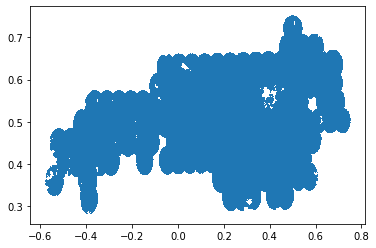

In [21]:
plt.plot(ra_lofar, dec_lofar, marker=",", ls="", alpha=1)